In [1]:
import math
import warnings
from typing import Callable, List, Optional, Sequence
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [2]:
# TODO: quitar esto cuando NetworkX funcione correctamente otra vez.
import matplotlib.cbook
warnings.simplefilter("ignore", matplotlib.cbook.mplDeprecation)

In [3]:
%matplotlib inline

# 2. Grafos
Un **grafo** es una colección de puntos y líneas que conectan parejas de 
estos puntos. A los puntos les llamamos **vértices** o **nodos** y a las
líneas **aristas** o **arcos**.

## 2.1 Representación en computadora
En general, hay tres formas de representar comunes de un grafo: Lista
(o tabla hash) de adyacencia, lista de incidencia y matriz de
adyacencia.

### Lista de incidencia
La lista de incidencia trata de imitar fielmente la definición
matemática conjuntista de que un grafo $G$ es una pareja $(V, E)$ donde
$V$ esl el conjunto de vértices y $E$ el de aristas.
Ejemplo:

In [4]:
G = (['A', 'B', 'C', 'D'], [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D')])

### Matriz de adyacencia
Todo grafo de $n$ tiene asociada su **matriz de adyacencia** $A = 
\left(a\right)_{i\, j}$dada por
$$\left(a\right)_{i\, j} = \begin{cases}
1 & \text{si hay una arista entre los vértices }v_i\text{ y }v_j;\\
0 & \text{si no.}
\end{cases}$$
**Observación** Esta representación depende de manera implícita de un
ordenamiento de los vértices.

Ejemplo:

In [5]:
G = [[0, 1, 1, 0],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 0, 1, 0]]

### Lista de adyacencia
La manera más común de representar un grafo en una computadora.
Cada vértice tiene asociado una colección de sus vecinos.
De manera tradicional esta colección de vecinos se representa mediante
una lista ligada, pero ahora es más común verla como una tabla hash
debido a las mejoras en la complejidad temporal.

Ejemplo:

In [6]:
G = {'A': {'B', 'C'},
     'B': {'A', 'C'},
     'C': {'A', 'B', 'D'},
     'D': {'C'}}

### Complejidad de operaciones básicas según su representación
He aquí un resumen de la complejidad computacional involucrada para
representar un grafo de $n$ vértices y $m$ aristas.

Operación        |Lista de incidencia|Matriz de adyacencia|Lista de adyacencia
-----------------|-------------------|--------------------|--------------------
Memoria          |$O(n + m)$         |$O(n^2)$            |$O(n + m)$
Consultar vértice|$O(1)$             |$O(1)$              |$O(n)$
Consultar arista |$O(m)$             |$O(1)$              |$O(1)$
Agregar vértice  |$O(1)$             |$O(n^2)$            |$O(1)$
Eliminar vértice |$O(n + m)$         |$O(n^2)$            |$O(n)$
Agregar arista   |$O(n)$             |$O(1)$              |$O(1)$
Eliminar arista  |$O(m)$             |$O(1)$              |$O(1)$
Iterar vértices  |$O(n)$             |$O(n)$              |$O(n)$
Iterar aristas   |$O(m)$             |$O(n^2)$            |$O(n + m)$
Iterar vecinos   |$O(n + m)$         |$O(n)$              |$O(n)$

## 2.2 Uso de NetworkX

NetworkX es una biblioteca de Python orientada al análisis de redes.
Internamente está basada en la representación por listas de adyacencia
usando tablas hash.

In [26]:
G = nx.Graph()
G.add_nodes_from(list('ABCD'))
G.nodes

NodeView(('A', 'B', 'C', 'D'))

In [27]:
G.add_edges_from([('A', 'C'), ('B', 'A')])
G.edges

EdgeView([('A', 'C'), ('A', 'B')])

In [28]:
G.add_path(['A', 'B', 'C'])
G.edges

AttributeError: 'Graph' object has no attribute 'add_path'

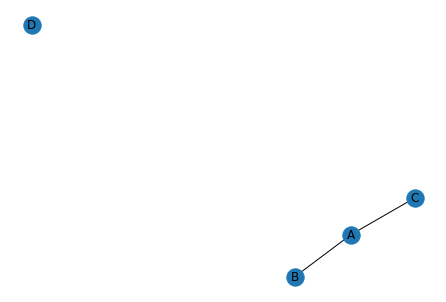

In [29]:
nx.draw(G, with_labels=True)

# 2.3 Creación de grafos

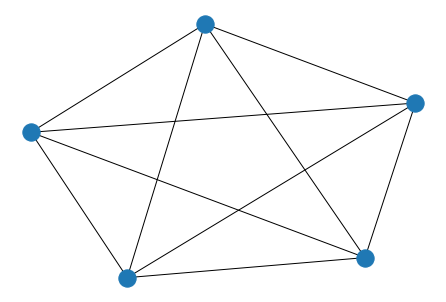

In [30]:
def grafo_completo(n: int) -> nx.Graph:
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in range(n):
        for v in range(u):
            G.add_edge(u, v)
    return G

nx.draw(grafo_completo(5))

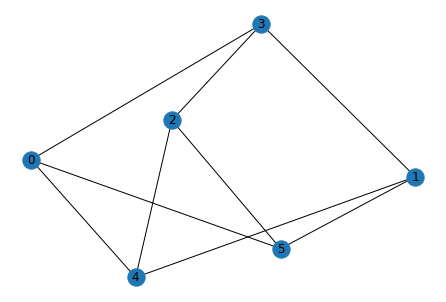

In [31]:
def grafo_bipartito(n1: int, n2:int) -> nx.Graph:
    G = nx.Graph()
    G.add_nodes_from(range(n1 + n2))
    for x in range(n1):
        for y in range(n1, n1 + n2):
            G.add_edge(x, y)
    return G
nx.draw(grafo_bipartito(3, 3), with_labels=True)

**Ejercicio:** Programar una función para crear un [grafo hipercubo][1]
de dimensión $k$.

**Doble clic aquí para ver la solución...**
<!--
```python
def grafo_hipercubo(k: int) -> nx.Graph:
    def son_vecinos(u: int, v: int):
        s, t, f = a_binario(u), a_binario(v), False
        for a, b in zip(s, t):         # Iterar los bits de s y t a la par
            if f and a != b:           # ¿Hallamos dos diferencias?
                return False           # No son vecinos
            f |= (a != b)              # Poner bandera si a y b son distintos
        return f
    
    a_binario = ('{:0' + str(k) + 'b}').format  # Función para convertir a bin.
    
    G = nx.Graph()
    G.add_nodes_from(range(2**k))
    for u in range(2**k):
        for v in range(u):
            if son_vecinos(u, v):
                G.add_edge(u, v)
    return G

nx.draw(grafo_hipercubo(4), with_labels=True)
```
-->

[1]:http://mathworld.wolfram.com/HypercubeGraph.html

Estos mismos algortimos ya vienen implementados en NetworkX.
Se pueden usar de la siguiente manera:
```python
G = nx.complete_graph(5)
G = nx.complete_bipartite_graph(3, 3)
G = nx.hypercube_graph(4)
```

## 2.4 El modelo de Erdős–Rényi

En 1060 los matemáticos Paul Erdős Alfréd Rényi publicaron su artículo
[On the evolution of random graphs](1) donde describen una manera de
generar grafos aleatorios y luego analizan sus características.

En su modelo, denotamos por $G\left(n, p\right)$ a uno de los grafos de
$n$ vértices donde cada una de las $\binom{n}{2}$ aristas posibles tiene
probabilidad $p$ de existir.

[1]:https://www.renyi.hu/~p_erdos/1960-10.pdf

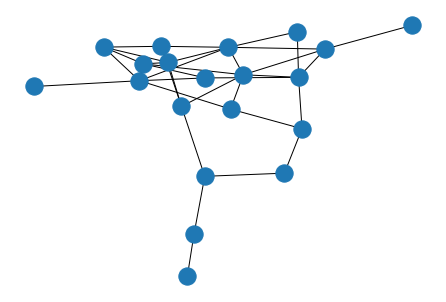

In [32]:
def tirar_moneda(p: float) -> bool:
    return random.random() <= p

def grafo_aleatorio(n: int, p: float) -> nx.Graph:
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in range(n):
        for v in range(u):
            if tirar_moneda(p):
                G.add_edge(u, v)
    return G

nx.draw(grafo_aleatorio(20, 0.2))

El estudio de estos grafos se hizo tomando en consideración
$n \to \infty$, de manera que la expresión *casi seguramente $X$* se
debe entender como *conforme $n \to \infty$, la probabilidad de que
ocurra $X$ tiende a $1$*; así, entre los resultados más interesantes del
artículo están los siguientes:

- Si $p < \frac{(1 - \varepsilon)\, \ln n}{n}$ entonces el grafo
  $G(n, p)$ casi seguramente tendrá vértices aislados (de grado 0) y
  por tanto será un grafo disconexo.
- Si $p > \frac{(1 + \varepsilon)\, \ln n}{n}$ entonces el grafo
  $G(n, p)$ casi seguramente será conexo.
- Por tanto, $p = \frac{\ln n}{n}$ es un umbral que delimita grafos
  conexos y disconexos.

Para poner a prueba este resultado vamos a programar un algoritmo que
determina si un grafo es conexo y luego vamos a calcular la probabilidad
de conexión mediante una serie de simulaciones.

In [33]:
def es_conexa(G: nx.Graph) -> bool:
    def visitar(u):
        visitados.add(u)               # Marcar u como visitado
        for v in G.neighbors(u):       # Para cada vecino v de u
            if v not in visitados:     # ¿v no ha sido visitado?
                visitar(v)             # Visitar v recursivamente
    
    visitados = set()                  # Conjunto de nodos visitados
    r = next(iter(G.nodes))            # Nodo inicial
    visitar(r)                         # Visitar vértices alcanzables desde r
    
    return set(G.nodes).issubset(visitados) # ¿Todos los nodos visitados?

Decimos que un nodo $v$ es alcanzable desde otro nodo $u$ en un
grafo $G$ si existe un camino de $u$ a $v$ en $G$.
Dado que este algoritmo salta de nodo en nodo es claro que todo nodo
visitado es alcanzable desde $r$.

**Teorema** *El algoritmo `es_conexa` visita a todos los vértices
alcanzables desde $r$ sin excepción.*
> *Demostración.* Supongamos que existe un vértice $z$ que es alcanzable
desde $r$ pero que no fue visitado.
Entonces existe un camino $r \leadsto z$ en $G$.
Sea $y$ el último vértice visitado en este camino. Sin pérdida de
generalidad podemos suponer que se trata del que está justo antes de
$z$ (de lo contrario podemos usar el primer vértice no visitado en
este camino en lugar de $z$), de modo que el camino se ve así:
$$r \leadsto y \to z$$
Como $y$ fue visitado entonces la línea 5 del algoritmo descubre que
$z$ aún no ha sido visitado y entonces lo visita.
>
> Esto es una contradicción, por lo tanto hemos demostrado que nuestra
premisa de que existe tal vértice $z$ es falsa. $\blacksquare$

**Teorema** El algoritmo `es_conexa` realiza $O(n + m)$ operaciones.
> *Demostración.* Primero notemos que `visitar` solo se puede ejecutar
exactamente una vez en cada nodo debido a la línea 3 y la condición en
la línea 5.
Entonces el peor caso ocurre precisamente cuando se visitan los $n$
nodos (y el grafo es conexo).
> En cada llamada a `visitar` se hace una cantidad de iteraciones $d_i$
que es la cantidad de vecinos del nodo $u_i$.
Por el [lema del saludo de manos][1] sabemos que
$$\sum_{i = 1}^{m} d_i = 2\,m$$
Por lo tanto, a lo largo de toda la ejecución se realizan $n$ llamadas
recursivas y $2\,m$ iteraciones. $\blacksquare$

[1]:https://en.wikipedia.org/w/index.php?title=Handshaking_lemma&oldid=897754973

Como es de esperarse, NetworkX ya tiene implementados los algoritmos
para crear un grafo $G(n, p)$ así como para determinar si un grafo es
conexo.

True

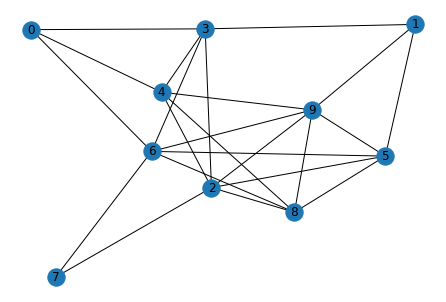

In [34]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)
nx.is_connected(G)

In [35]:
def prob_conexa(n: int, p: float, iters: int = 400) -> float:
    """
    Determina la probabilidad de que un grafo aleatorio G(n, p) sea
    conexo haciendo iters experimentos.
    """
    grafos = (nx.erdos_renyi_graph(n, p) for _ in range(iters))
    conexos = map(nx.is_connected, grafos)
    return sum(conexos)/iters

In [36]:
def graficar_prob_conexa(
    n: int, p: Optional[Sequence[float]]=None, iters: int=400) -> float:
    if p is None:
        p = np.linspace(0, 1, 50)
    y = [prob_conexa(n, p_i, iters=400) for p_i in p]
    p_star = math.log(n)/n
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Probabilidad de arista (p)')
    ax.set_ylabel('Probabilidad de ser conexa')
    ax.axvline(p_star, color='tomato', label='Valor umbral teórico')
    ax.plot(p, y, color='blue', label='Simulación')
    ax.legend()
    return fig, ax

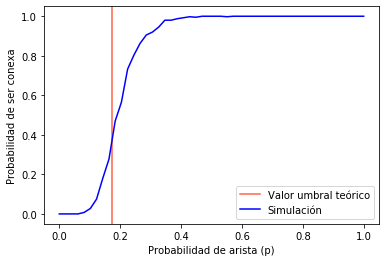

In [37]:
fig, ax = graficar_prob_conexa(16, iters=25600)

## Ejercicios

### Ej. 1. Recorrido en profundidad iterativo
El recorrido en profundidad visto en `es_conexa` se puede adaptar para
muchos otros usos; para esto expresamos el algoritmo con dos argumentos
más que serán funciones `descubrir` y `finalizar`.
En este ejercicio se te pide convertir este algoritmo en una versión
iterativa usando una pila para simular la recursividad.

**Nota** En Python una pila se puede implementar mediante una lista.
`pila.append(x)` sirve para apilar `x` en la cima y `pila.pop()` para
desapilar el elemento de la cima.

In [63]:
def visitar(u, visitados,
            descubrir: Callable, finalizar: Callable):
        visitados.add(u)
        descubrir(u)
        for v in G.neighbors(u):
            if v not in visitados:
                visitar(v, visitados, descubrir, finalizar)
        finalizar(u)

In [64]:
def recorrido_en_profundidad(G: nx.Graph, 
                             descubrir: Callable, finalizar: Callable):
    visitados = set()
    for r in G.nodes:
        if r not in visitados:
            visitar(r, visitados, descubrir, finalizar) 

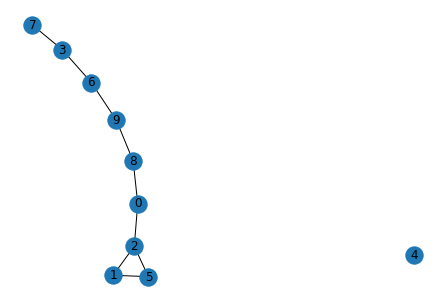

In [65]:
G = nx.erdos_renyi_graph(10, 0.1, seed=42)
nx.draw(G, with_labels=True)

In [66]:
# Ejemplo:
def descubrir(u):
    print(f'Descubrir nodo {u}')

def finalizar(u):
    print(f'Finalizar nodo {u}')

# Acá debes usar la versión iterativa en lugar de la versión recursiva y
# obtener el mismo resultado que en la versión recursiva:
recorrido_en_profundidad(G, descubrir, finalizar)

Descubrir nodo 0
Descubrir nodo 2
Descubrir nodo 1
Descubrir nodo 5
Finalizar nodo 5
Finalizar nodo 1
Finalizar nodo 2
Descubrir nodo 8
Descubrir nodo 9
Descubrir nodo 6
Descubrir nodo 3
Descubrir nodo 7
Finalizar nodo 7
Finalizar nodo 3
Finalizar nodo 6
Finalizar nodo 9
Finalizar nodo 8
Finalizar nodo 0
Descubrir nodo 4
Finalizar nodo 4


### Ej. 2 Una variante para el modelo de Erdős–Rényi 
En lugar de definir los parámetros $n$ y $p$ para el modelo de
Erdős–Rényi, una variante utiliza los parámetros $n$ y $m$, es decir, el
número de nodos y de aristas.
Su implementación es un poco más complicada y se ha dejado como
ejercicio.

1. Escribe un algoritmo `simular_urna` que reciba como parámetros una
   lista de `elementos` y un número entero `k`; el algoritmo debe de
   arrojar $k$ elementos sin repetición tomados al azar de la lista;
   todos los elementos de la lista deben tener la misma probabilidad de
   ser sacados de la urna; tu algoritmo debe tener complejidad $O(k)$.

In [23]:
# Por lo que se esto no es O(k) pero no supe como hacerle
def simular_urna(elementos: List, k: int) -> List:
    y = list()
    for i in range(k):                      # Tomamos k elementos
        y.append(random.choice(elementos))  # agregamos un elemento aleatoriamente a la lista
        elementos.remove(y[i])              # quitamos el elemento de la lista para que no se repita
    return y

2. Implementa `grafo_gnm(n, m)` que genera un grafo aleatorio de $n$
   nodos y $m$ aristas sin repetición que son tomadas al azar de la
   lista de todas las aristas posibles entre $n$ nodos. 

In [24]:
# En esta creo la lista de aristas sin repeticion desde el inicio
def grafo_gnm(n: int, m: int) -> nx.Graph:
    G = nx.Graph()
    elementos = []
    nodos = range(n)
    # Generamos todas las aristas sin repeticion
    for i in nodos:
        for j in range(i):
            elementos.append((i,j))    #Agregamos la arista 
    G.add_nodes_from(nodos)
    E = simular_urna(elementos, m)     #Tomamos m aristas de la lista
    G.add_edges_from(E)
    return G

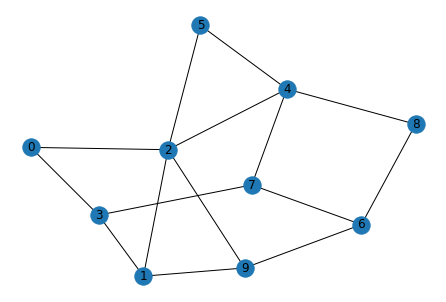

In [25]:
m_graph = grafo_gnm(10, 15)
nx.draw(m_graph, with_labels=True)

3. Escribe una versión de `graficar_prob_conexa` que reciba en lugar de
   graficar para distintos valores de $p\in[0, 1]$ lo haga para
   distintos valores de $m = 0, 1, 2, \ldots, \binom{n}{2}$.

In [ ]:
def prob_gnm_conexa(n: int, m: int, iters=400) -> float:
    contador = 0
    for i in range(iters):
        grafo_m = grafo_gnm(n, m)          #Generamos un grafo_gnm
        if es_conexa(grafo_m):             #Comprobamos si es conexo
            contador += 1                  
    return contador/iters                 #Probabilidad de que un grafo sea conexo

In [ ]:
def graficar_prob_gnm__conexa(
        n: int, m: Optional[Sequence[int]]=None, iters: int=400) -> int:
    
    pst = math.log(n) / n
    ps = np.linspace(0, 1, 50)
    ms = [int(p * n * (n-1) / 2) for p in ps]
    ys = [prob_gnm_conexa(n, m, iters = 400) for m in ms]
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Probabilidad de arista (p)')
    ax.set_ylabel('Probabilidad de ser conexa')
    ax.axvline(pst, color='tomato', label='Valor umbral teórico')
    ax.plot(ps, ys, color='blue', label='Simulación')
    ax.legend()
    
    return fig, ax

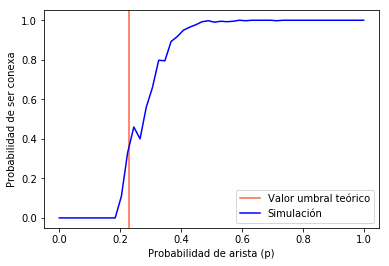

In [29]:
fig, ax = graficar_prob_gnm__conexa(10, iters=25600)

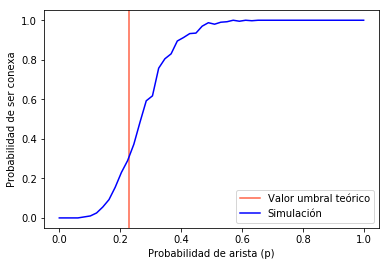

In [30]:
fig, ax = graficar_prob_conexa(10, iters=25600)

4. ¿Cómo se comparan los resultados entre las dos variantes del modelo?
   Discute tus observaciones.

- Por lo que puedo ver de varias simulaciones en el modelo gnp(vertices, probabilidad) es mas estable que el gnm(vertices, aristas), esto es, tiene menos variaciones en la probabilidad de conexidad, en otras palabras la curva que genera no tiene tantas variaciones.
- Tambien se puede ver en gnm que al tener en algun momento la probabilidad de ser conexa aumenta mas rapido y en algunas simulaciones decae o en otros casos esto pasa tambien con la gnp.
- En la mayoria de las simulaciones parece ser que en el modelo gnm la probabilidad de conexidad es mayor que en gnp. 